**Part 1: Data Source and Contents**

I used the DQA and Dataset that was used here (https://github.com/ysasson-portfolio/BSAN_6070_CA_03_Decision_Tree_Algorithm). For the DQA, I could not run it on this set becuase the AutoViz library hijacked the functionality of the matplotlib library. This made it impossible to generate all of the graphs in the python code within each separate section relevant to that specific piece of information. You can find the DQA reasonings in the github link I included.

In [1]:
#Import Necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [2]:
#Import the database to a dataframe
df=pd.read_csv("https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true")

In [3]:
df

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0
...,...,...,...,...,...,...,...,...,...,...,...
48837,b. 31-40,e. High,b. Mid,a. = 0,b. Mid,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,test,0
48838,b. 31-40,b. Mid - Low,a. Low,a. = 0,b. Mid,b. 9-12,b. Mid,a. no income,c. 31-35 & 61-70,test,0
48839,d. 41-50 & 61-70,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,test,0
48840,b. 31-40,b. Mid - Low,a. Low,c. > 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,test,0


In [4]:
#DQA

#Find Missing Values within each column

df.isnull().sum()

#Going through each column except for the last two and removing the letter identifier for each bin
for col in df.drop(columns = ["flag","y"]):
    df[col] = df[col].str.split(".", n=1, expand = True)[1]


#Find NANs
df.isna().sum()


,0
hours_per_week_bin,0
occupation_bin,0
msr_bin,0
capital_gl_bin,0
race_sex_bin,0
education_num_bin,0
education_bin,0
workclass_bin,0
age_bin,0
flag,0


In [5]:
# Encoding using multiple methods depending on the data

#Identify which columns need one hot encoding and ordinal encoding
ordinal_cols=["education_num_bin","hours_per_week_bin", "capital_gl_bin", "age_bin"]
one_hot_cols=["education_bin", "occupation_bin", "msr_bin", "race_sex_bin", "workclass_bin"]

#Use ordinal encoding on specific columns and update the main dataframe
ordinal_encoder=OrdinalEncoder()
df[ordinal_cols]= ordinal_encoder.fit_transform(df[ordinal_cols])

#Use one hot encoding on the specified columns and update the main dataframe
df=pd.get_dummies(df, columns=one_hot_cols, drop_first=False)

In [6]:
#Check for Duplicate entries

df.duplicated().sum()

np.int64(40012)

In [7]:
#Creating X Train Y Train X Test and Y Test

df_train = df[df['flag'] == 'train']
df_test = df[df['flag'] == 'test']

x_train = df_train.drop(['y','flag'], axis=1)
y_train = df_train['y']

x_test = df_test.drop(['y','flag'], axis=1)
y_test = df_test['y']

**Part 2: Analyzing the process of obtaining the optimal value of a key ensemble method hyperparameter.**

This code shows the process of building an ensemble model or classifier model and storing the performance scores of various hyperparameters. Once we put these features on a graph we can visualize this performance.

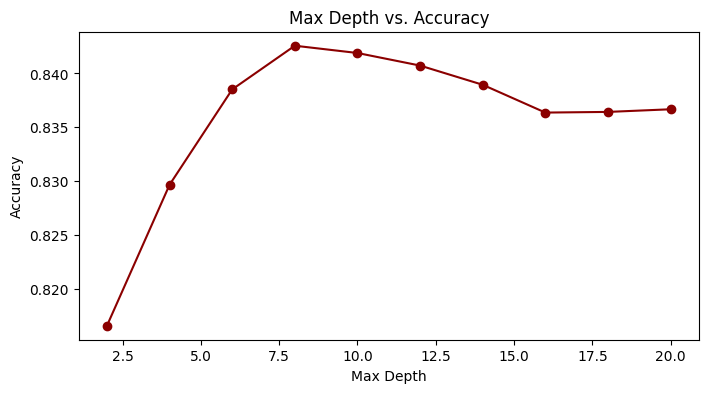

In [8]:
#Created an empty list to store the results for the Max Depth chart vs Accuracy
results=[]

#Store all depth values in a list
max_depth_options= [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]

#Run the decision tree algorithm with all default settings except for the max depth
#Run the max depth through all the values stored in the list
for trees in max_depth_options:
    model=DecisionTreeClassifier(max_depth=trees, random_state=101)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy= np.mean(y_test==y_pred)
    results.append(accuracy)


#Create the graph for the max depth vs. accuracy
plt.figure(figsize=(8,4))
pd.Series(results,max_depth_options).plot(color='darkred', marker='o');
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Max Depth vs. Accuracy')
plt.show()

**Part 3. Building and Testing Various Parameters of a Random Forest Model**

In [9]:

#Create the list of the number of estimators in each iteration of the test.
n_estimator_value= np.arange(50,550,50)

#Create empty list in order to store the results for accuracy and AUC score in each iteration with different estimator values
accuracy_score_random_forest=[]
auc_score_random_forest=[]

#Run and train the classifier with each value in the number of estimator list
for estimator_value in n_estimator_value:
    clf_random_forest=RandomForestClassifier(n_estimators=estimator_value,random_state=101)
    clf_random_forest.fit(x_train,y_train)
    y_pred_random_forest=clf_random_forest.predict(x_test)
#Calculate the accuracy and AUC scores for that iteration
    accuracy_random_forest=accuracy_score(y_test,y_pred_random_forest)
    auc_random_forest= roc_auc_score(y_test,y_pred_random_forest)
#Storing the results of each iteration in the results lists
    accuracy_score_random_forest.append(accuracy_random_forest)
    auc_score_random_forest.append(auc_random_forest)

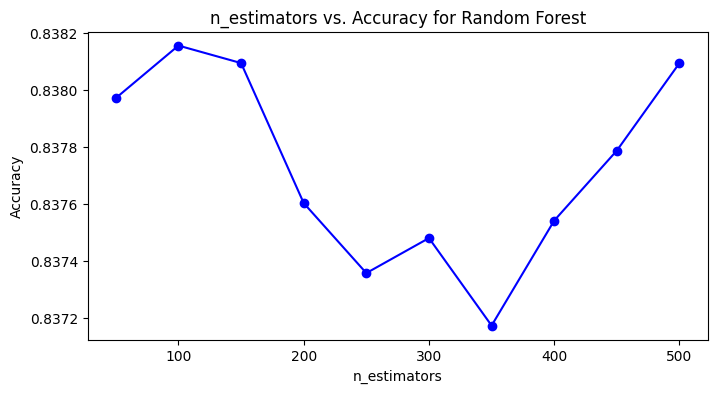

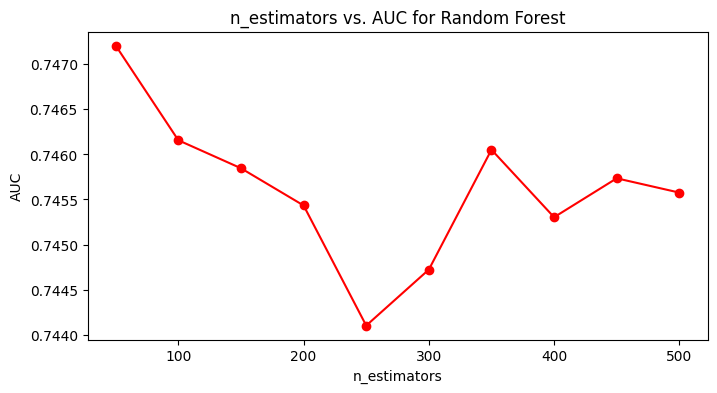

In [10]:
#Plot the n_estimators vs. the Accuracy score
plt.figure(figsize=(8,4))
plt.plot(n_estimator_value, accuracy_score_random_forest, color='blue', marker='o', label='Accuracy');
plt.title('n_estimators vs. Accuracy for Random Forest')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.show()

# Plot the n_estimators vs. the AUC Score
plt.figure(figsize=(8,4))
plt.plot(n_estimator_value, auc_score_random_forest, color='red', marker='o', label='AUC');
plt.title('n_estimators vs. AUC for Random Forest')
plt.xlabel('n_estimators')
plt.ylabel('AUC')
plt.show()

Write your observations about the Classifier’s behavior with respect to the number of estimators

As you can see in the 2 charts above, the AUC and Accuracy scores start very high. However, the AUC curve starts to decline immediately until 250 estimators. After 250 estimators, the AUC will increase until it reaches 350 estimators and will begin to level out around 0.7455.

The Accuracy score graph starts to increase and then decreases from 100 estimators to 350 and then sharply increase until it hits an accuracy score of 0.8381.

Is there an optimal value of the estimator within the given range?

For this model, the optimal value for the AUC score presents itself when there are 50 estimators in the model. The optimal value for the Accuracy score presents itself when there are 100 estimators in the model.

**Building and Testing Various Parameters of a ADA Boost Model**

In [11]:

#Create empty list in order to store the results for accuracy and AUC score in each iteration with different estimator values
accuracy_score_ada_boost=[]
auc_score_ada_boost=[]

#Run and train the classifier with each value in the number of estimator list
for estimator_value in n_estimator_value:
    clf_ada_boost=AdaBoostClassifier(n_estimators=estimator_value,random_state=101)
    clf_ada_boost.fit(x_train,y_train)
    y_pred_ada_boost=clf_ada_boost.predict(x_test)
#Calculate the accuracy and AUC scores for that iteration
    accuracy_ada_boost=accuracy_score(y_test,y_pred_ada_boost)
    auc_ada_boost= roc_auc_score(y_test,y_pred_ada_boost)
#Storing the results of each iteration in the results lists
    accuracy_score_ada_boost.append(accuracy_ada_boost)
    auc_score_ada_boost.append(auc_ada_boost)

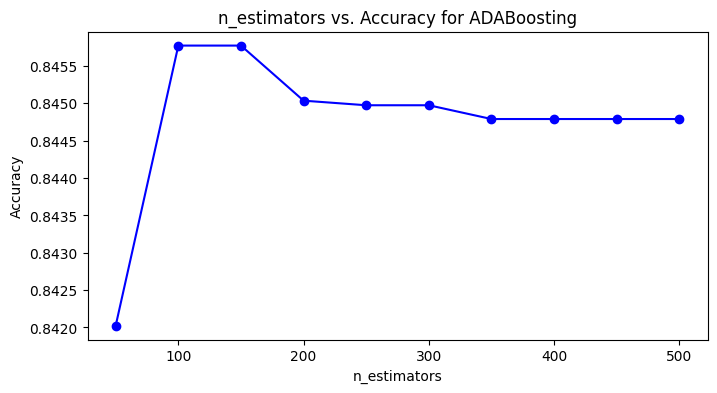

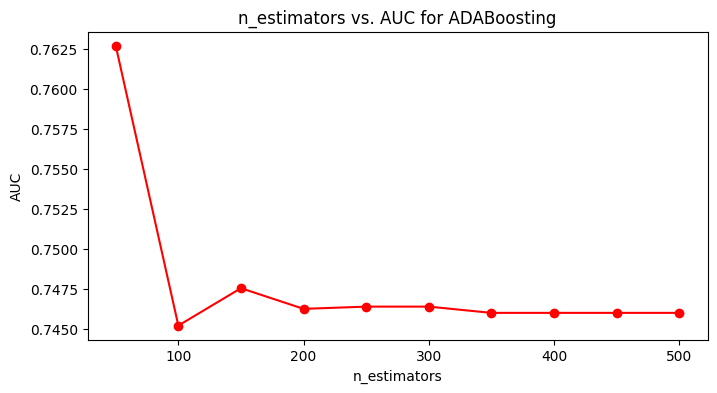

In [12]:
#Plot the n_estimators vs. the Accuracy score
plt.figure(figsize=(8,4))
plt.plot(n_estimator_value, accuracy_score_ada_boost, color='blue', marker='o', label='Accuracy')
plt.title('n_estimators vs. Accuracy for ADABoosting')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.show()

# Plot the n_estimators vs. the AUC Score
plt.figure(figsize=(8,4))
plt.plot(n_estimator_value, auc_score_ada_boost, color='red', marker='o', label='AUC')
plt.title('n_estimators vs. AUC for ADABoosting')
plt.xlabel('n_estimators')
plt.ylabel('AUC')
plt.show()

Write your observations about the Classifier’s behavior with respect to the number of estimators

This is the first graph from these performance tests where they are drastically different. The Accuracy graph starts with a sharp increase until it reaches 100 estimators. It stays consistent until 150 estimators. After that the data will decrease to roughly .8450 and then stays consistent with slight variation in that field.

For the AUC graph, it starts with a sharp decrease from 50 to 100 estimators followed by a slight increase from 100 to 150 estimators. From 150 estimators on, it begins to level off at around .7475.

Is there an optimal value of the estimator within the given range?

With respect to the AUC score, the optimal value of estimators would be 50. With respect to the accuracy score, there is a tie for optimal value of estimators at 100 and 150 estimators. IF I had to choose which one was better with respect to accuracy, it would be at 150 estimators because the AUC score at 150 estimators is better than it is at 100.

**Building and Testing Various Parameters of a Gradient Boost Model**

In [13]:
#Create empty list in order to store the results for accuracy and AUC score in each iteration with different estimator values
accuracy_score_gradient_boost=[]
auc_score_gradient_boost=[]

#Run and train the classifier with each value in the number of estimator list
for estimator_value in n_estimator_value:
    clf_gradient_boost=GradientBoostingClassifier(n_estimators=estimator_value,random_state=101)
    clf_gradient_boost.fit(x_train,y_train)
    y_pred_gradient_boost=clf_gradient_boost.predict(x_test)
#Calculate the accuracy and AUC scores for that iteration
    accuracy_gradient_boost=accuracy_score(y_test,y_pred_gradient_boost)
    auc_gradient_boost= roc_auc_score(y_test,y_pred_gradient_boost)
#Storing the results of each iteration in the results lists
    accuracy_score_gradient_boost.append(accuracy_gradient_boost)
    auc_score_gradient_boost.append(auc_gradient_boost)

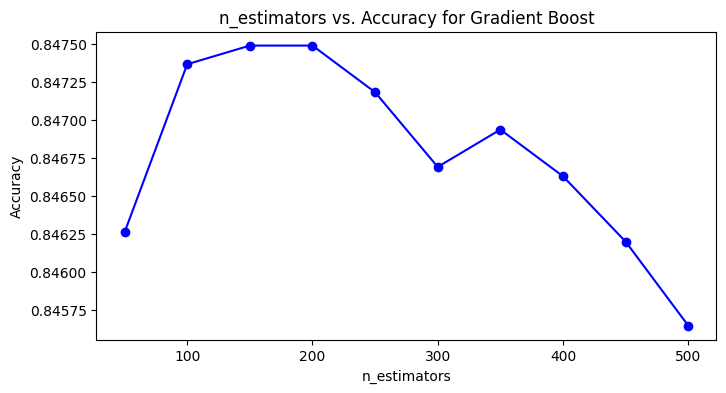

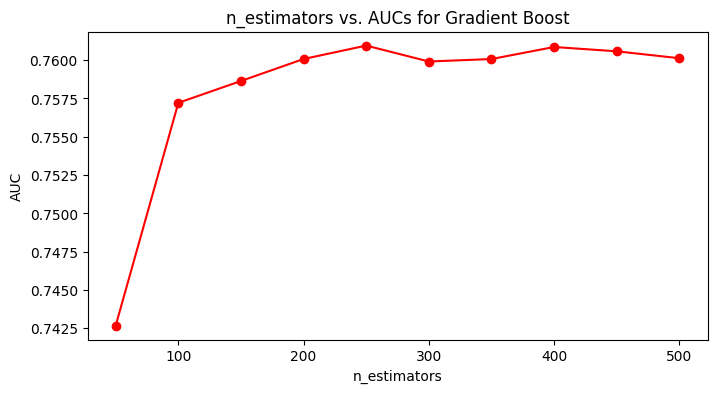

In [14]:
#Plot the n_estimators vs. the Accuracy score
plt.figure(figsize=(8,4))
plt.plot(n_estimator_value, accuracy_score_gradient_boost, color='blue', marker='o', label='Accuracy')
plt.title('n_estimators vs. Accuracy for Gradient Boost')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.show()

# Plot the n_estimators vs. the AUC Score
plt.figure(figsize=(8,4))
plt.plot(n_estimator_value, auc_score_gradient_boost, color='red', marker='o', label='AUC')
plt.title('n_estimators vs. AUCs for Gradient Boost')
plt.xlabel('n_estimators')
plt.ylabel('AUC')
plt.show()


Write your observations about the Classifier’s behavior with respect to the number of estimators

These two graphs begin very similarly. From 50 to 100 estimators, there is a sharp increase from both the AUC Score and the Accuracy score followed by another slight increase from 100 to 200 estimators. After that is where the two graphs differ.

The AUC Score graph fluctuates slightly but all values are within a range of 0.25%. The values remain very similar and has a consistent range.

The Accuracy score is heading in a downward trend after 125 estimators even when there is a slight increase at 300 to 350 estimators. This score does not help with the performance though as it continues to decline after 250 estimators.

Is there an optimal value of the estimator within the given range?

With respect to the accuracy score, the number of estimators that is optimal is 150 estimators. The AUC score is where it is more difficult to tell. The optimal value with respect to AUC is 400 estimators.

**Building and Testing Various Parameters of a XGB Model**

In [15]:

#Create empty list in order to store the results for accuracy and AUC score in each iteration with different estimator values
accuracy_score_xgb=[]
auc_score_xgb=[]

#Run and train the classifier with each value in the number of estimator list
for estimator_value in n_estimator_value:
    clf_xgb=XGBClassifier(n_estimators=estimator_value,random_state=101)
    clf_xgb.fit(x_train,y_train)
    y_pred_xgb=clf_xgb.predict(x_test)
#Calculate the accuracy and AUC scores for that iteration
    accuracy_xgb=accuracy_score(y_test,y_pred_xgb)
    auc_xgb= roc_auc_score(y_test,y_pred_xgb)
#Storing the results of each iteration in the results lists
    accuracy_score_xgb.append(accuracy_xgb)
    auc_score_xgb.append(auc_xgb)

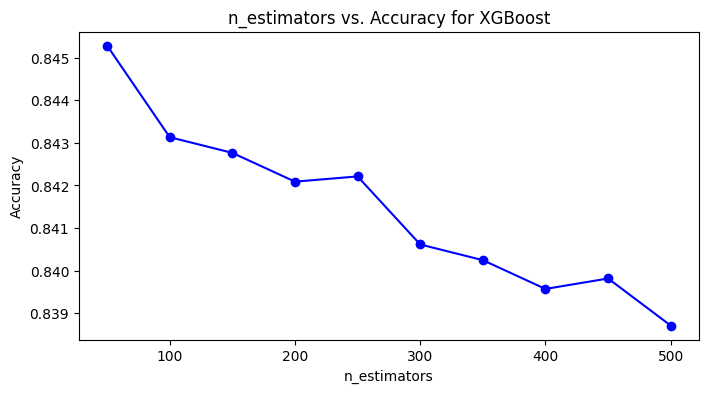

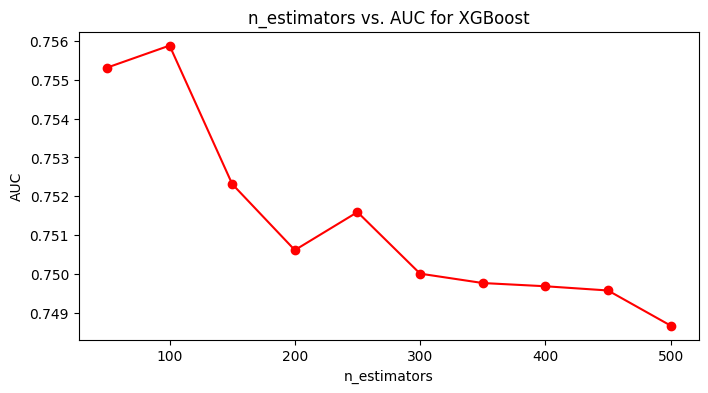

In [16]:
#Plot the n_estimators vs. the Accuracy score
plt.figure(figsize=(8,4))
plt.plot(n_estimator_value, accuracy_score_xgb, color='blue', marker='o', label='Accuracy')
plt.title('n_estimators vs. Accuracy for XGBoost')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.show()

# Plot the n_estimators vs. the AUC Score
plt.figure(figsize=(8,4))
plt.plot(n_estimator_value, auc_score_xgb, color='red', marker='o', label='AUC')
plt.title('n_estimators vs. AUC for XGBoost')
plt.xlabel('n_estimators')
plt.ylabel('AUC')
plt.show()

Write your observations about the Classifier’s behavior with respect to the number of estimators

Both the Accuracy and the AUC score decline at a pretty similar rate as more estimators are involved in the XGB Model. While the scores are different values, the only difference that is really drastic is the slope change from 50 to 100 estimators. There is a more drastic drop from the AUC score than the accuracy at the start of graph. The more estimators we add to this classifier, the worse the performance gets.

Is there an optimal value of the estimator within the given range?

With respect to the Accuracy score, the optimal number of estimators is going to be 50 estimators. With respect to the AUC score, the optimal number of estimators is going to be 100 estimators.

**Part 5: Comparing Performance**

In [17]:
#Build a dictionary that we would use in order to build the dataframe with the max results for each AUC and accuracy score from each classifier
max_data = {
    'Random Forest': [max(accuracy_score_random_forest), max(auc_score_random_forest)],
    'ADABoost': [max(accuracy_score_ada_boost), max(auc_score_ada_boost)],
    'Gradient Boost': [max(accuracy_score_gradient_boost), max(auc_score_gradient_boost)],
    'XGBoost': [max(accuracy_score_xgb), max(auc_score_xgb)]
}

# Create the DataFrame
df_compare = pd.DataFrame(max_data, index=['Accuracy', 'AUC'])
df_compare

,Random Forest,ADABoost,Gradient Boost,XGBoost
Accuracy,0.838155,0.845771,0.847491,0.845280
AUC,0.747202,0.762696,0.760955,0.755877
